### Portfolio Analysis

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

In [2]:
# Initialize dictionary to store uploaded files
uploaded_files = {}

In [3]:
for _ in range(8):
    # Upload files
    uploaded = files.upload()

    # Update dictionary with newly uploaded files
    uploaded_files.update(uploaded)

Saving AAPL_close.csv to AAPL_close.csv


Saving VFH_close.csv to VFH_close.csv


Saving SP500_close.csv to SP500_close.csv


Saving MCD_close.csv to MCD_close.csv


Saving JPM_close.csv to JPM_close.csv


Saving VUG_close.csv to VUG_close.csv


Saving VZ_close.csv to VZ_close.csv


Saving CVX_close.csv to CVX_close.csv


In [4]:
aapl = Path("AAPL_close.csv")
vfh = Path("VFH_close.csv")
sp = Path("SP500_close.csv")
mcd = Path("MCD_close.csv")
jpm = Path("JPM_close.csv")
vug = Path("VUG_close.csv")
vz = Path("VZ_close.csv")
cvx = Path("CVX_close.csv")


aapl_df = pd.read_csv(aapl, index_col="Date", infer_datetime_format=True, parse_dates=True)
vfh_df = pd.read_csv(vfh, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df = pd.read_csv(sp, index_col="Date", infer_datetime_format=True, parse_dates=True)
mcd_df = pd.read_csv(mcd, index_col="Date", infer_datetime_format=True, parse_dates=True)
jpm_df = pd.read_csv(jpm, index_col="Date", infer_datetime_format=True, parse_dates=True)
vug_df = pd.read_csv(vug, index_col="Date", infer_datetime_format=True, parse_dates=True)
vz_df = pd.read_csv(vz, index_col="Date", infer_datetime_format=True, parse_dates=True)
cvx_df = pd.read_csv(cvx, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_df.head()

<ipython-input-4-30c4e60e6b18>:11: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl, index_col="Date", infer_datetime_format=True, parse_dates=True)
<ipython-input-4-30c4e60e6b18>:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vfh_df = pd.read_csv(vfh, index_col="Date", infer_datetime_format=True, parse_dates=True)
<ipython-input-4-30c4e60e6b18>:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org

,SP500_Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912


In [5]:
display(aapl_df.head())
display(vfh_df.head())
sp_df.head()

,AAPL_close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500


,VFH_Close
Date,
2019-01-02,59.810001
2019-01-03,58.779999
2019-01-04,60.700001
2019-01-07,60.840000
2019-01-08,60.930000


,SP500_Close
Date,
2019-01-02,2510.030029
2019-01-03,2447.889893
2019-01-04,2531.939941
2019-01-07,2549.689941
2019-01-08,2574.409912


In [6]:
df= pd.concat([aapl_df, sp_df,vfh_df,mcd_df,jpm_df,vug_df,vz_df,cvx_df], axis = 1, join = 'inner')
df.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,39.480000,2510.030029,59.810001,176.059998,99.309998,134.289993,56.020000,110.690002
2019-01-03,35.547501,2447.889893,58.779999,174.899994,97.110001,130.179993,56.220001,108.570000
2019-01-04,37.064999,2531.939941,60.700001,178.279999,100.690002,135.360001,56.360001,110.820000
2019-01-07,36.982498,2549.689941,60.840000,180.220001,100.760002,136.740005,56.720001,112.260002
2019-01-08,37.687500,2574.409912,60.930000,180.600006,100.570000,138.410004,58.380001,111.769997


In [7]:
#Removing null values
#df.dropna(inplace=True)
#checking if there are nulls
df.isnull().sum()


AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

In [8]:
df_close =df.iloc[:, 2:]

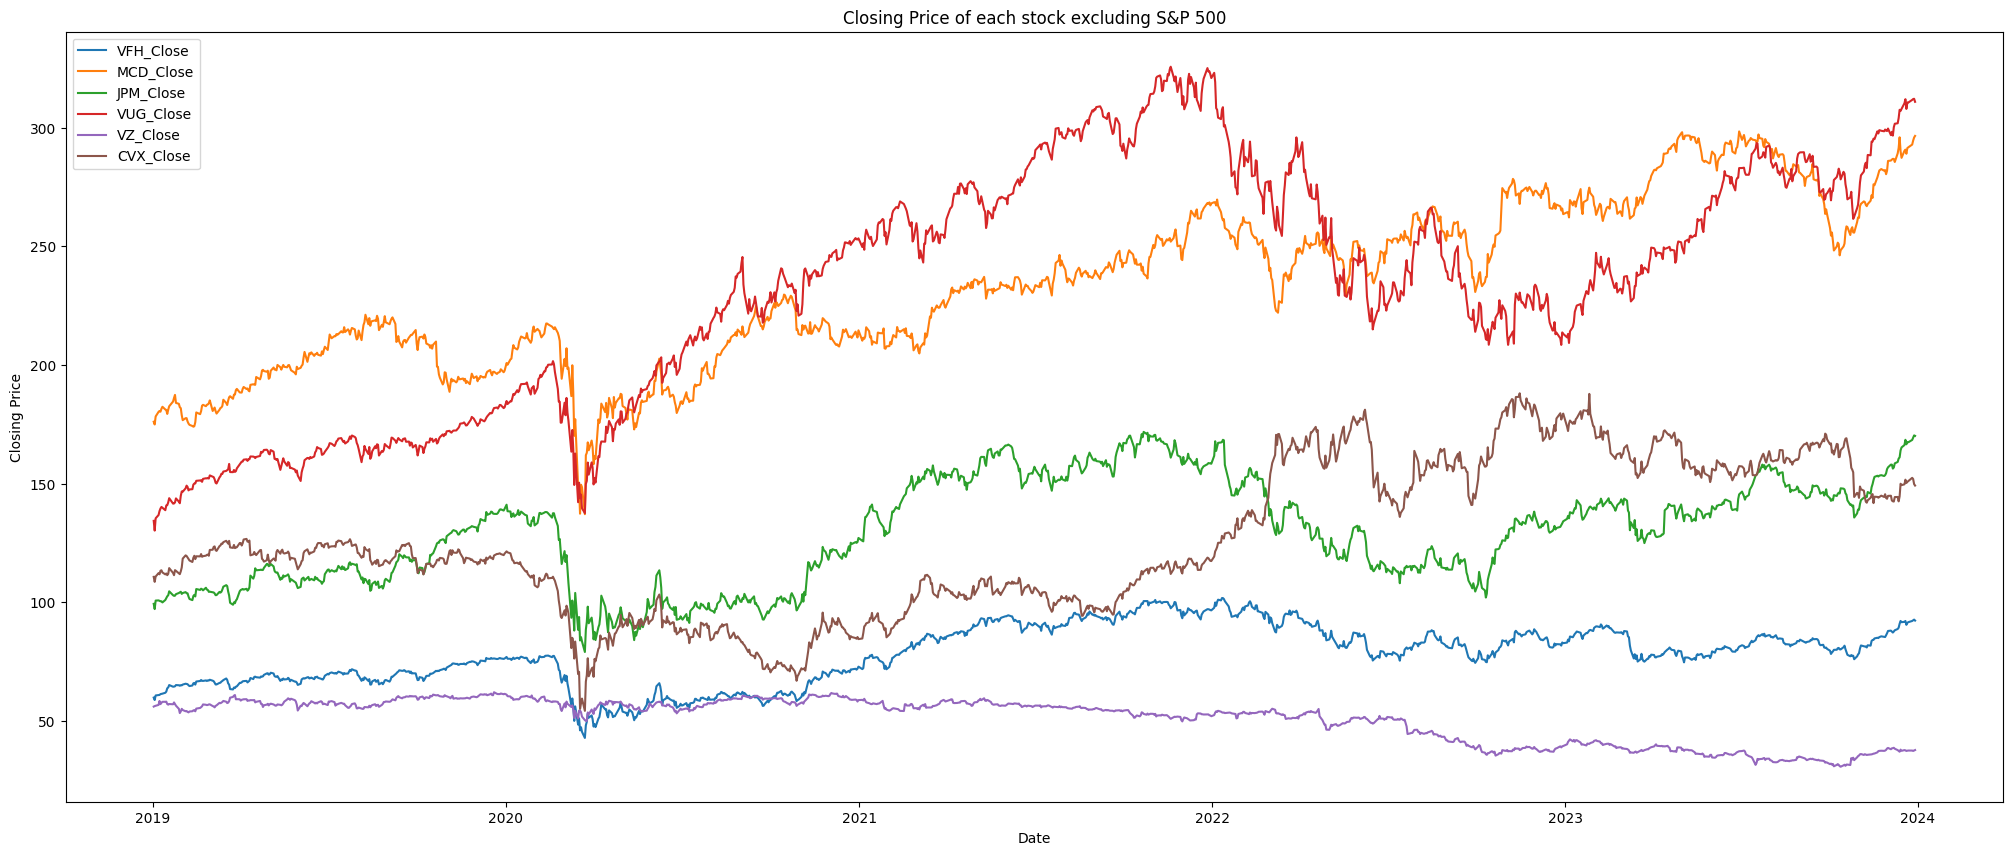

In [9]:
#visual representation of the closing price of each stock
plt.figure(figsize=(25, 10))
for column in df_close.columns:
        plt.plot(df_close.index, df_close[column], label=column)

plt.title('Closing Price of each stock excluding S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [10]:
daily_returns = df.pct_change()
daily_returns

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.024757,-0.017221,-0.006589,-0.022153,-0.030605,0.003570,-0.019153
2019-01-04,0.042689,0.034336,0.032664,0.019325,0.036865,0.039791,0.002490,0.020724
2019-01-07,-0.002226,0.007010,0.002306,0.010882,0.000695,0.010195,0.006388,0.012994
2019-01-08,0.019063,0.009695,0.001479,0.002109,-0.001886,0.012213,0.029267,-0.004365
...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,0.001660,0.003176,0.001064,-0.000597,-0.000097,0.001603,0.002256
2023-12-26,-0.002841,0.004232,0.005459,0.003977,0.005914,0.003574,-0.000267,0.009004
2023-12-27,0.000518,0.001430,0.003149,0.005771,0.005998,0.001123,-0.004536,-0.003281


<Axes: xlabel='Date'>

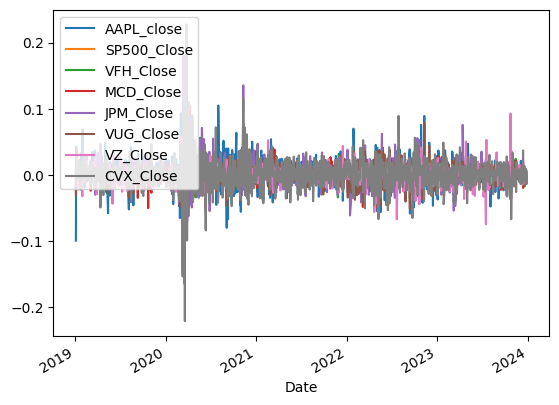

In [11]:
# Plot daily returns of all portfolios
daily_returns.plot()

In [12]:
daily_returns.isnull().sum()

AAPL_close     1
SP500_Close    1
VFH_Close      1
MCD_Close      1
JPM_Close      1
VUG_Close      1
VZ_Close       1
CVX_Close      1
dtype: int64

In [13]:
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

In [14]:
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-01-03 to 2023-12-29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AAPL_close   1257 non-null   float64
 1   SP500_Close  1257 non-null   float64
 2   VFH_Close    1257 non-null   float64
 3   MCD_Close    1257 non-null   float64
 4   JPM_Close    1257 non-null   float64
 5   VUG_Close    1257 non-null   float64
 6   VZ_Close     1257 non-null   float64
 7   CVX_Close    1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


In [15]:
daily_returns.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-03,-0.099607,-0.024757,-0.017221,-0.006589,-0.022153,-0.030605,0.003570,-0.019153
2019-01-04,0.042689,0.034336,0.032664,0.019325,0.036865,0.039791,0.002490,0.020724
2019-01-07,-0.002226,0.007010,0.002306,0.010882,0.000695,0.010195,0.006388,0.012994
2019-01-08,0.019063,0.009695,0.001479,0.002109,-0.001886,0.012213,0.029267,-0.004365
2019-01-09,0.016982,0.004098,0.005580,-0.001717,-0.001690,0.007803,-0.022782,0.013420


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


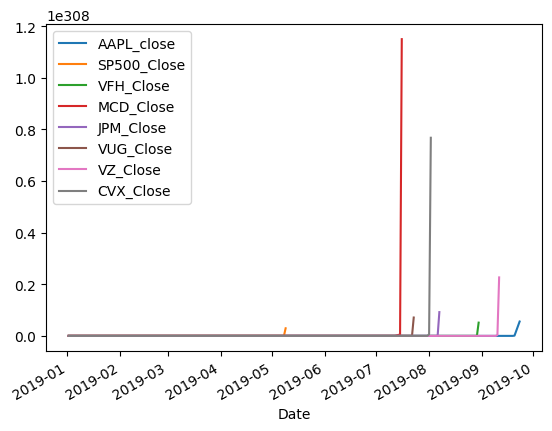

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_return = df.cumprod()
cumulative_return
# Plot cumulative returns
cumulative_return.plot()

In [17]:
cumulative_return.head()

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,3.948000e+01,2.510030e+03,5.981000e+01,1.760600e+02,9.931000e+01,1.342900e+02,5.602000e+01,1.106900e+02
2019-01-03,1.403415e+03,6.144277e+06,3.515632e+03,3.079289e+04,9.643994e+03,1.748187e+04,3.149444e+03,1.201761e+04
2019-01-04,5.201759e+04,1.555694e+10,2.133989e+05,5.489757e+06,9.710538e+05,2.366346e+06,1.775027e+05,1.331792e+06
2019-01-07,1.923740e+06,3.966538e+13,1.298319e+07,9.893640e+08,9.784338e+07,3.235742e+08,1.006795e+07,1.495070e+08
2019-01-08,7.250096e+07,1.021149e+17,7.910655e+08,1.786791e+11,9.840109e+09,4.478590e+10,5.877671e+08,1.671039e+10


In [18]:
cumulative_return.isnull().sum()

AAPL_close     0
SP500_Close    0
VFH_Close      0
MCD_Close      0
JPM_Close      0
VUG_Close      0
VZ_Close       0
CVX_Close      0
dtype: int64

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio

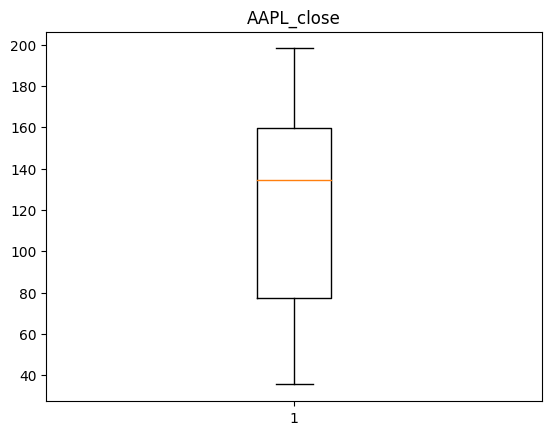

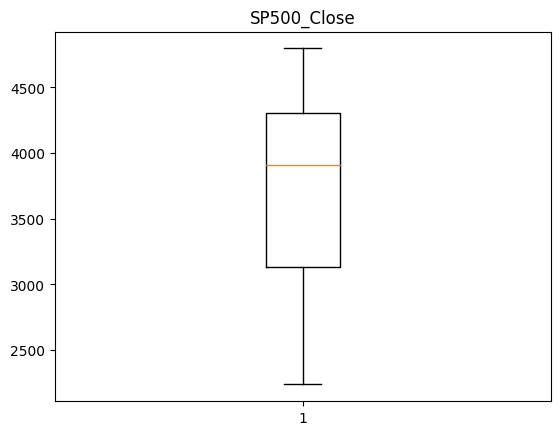

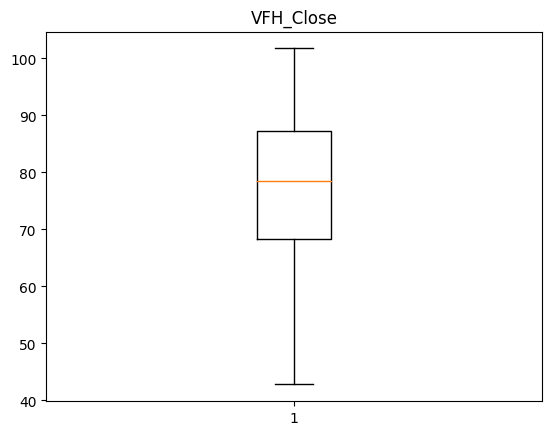

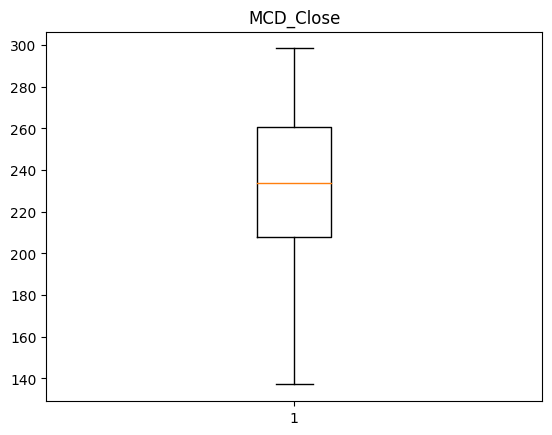

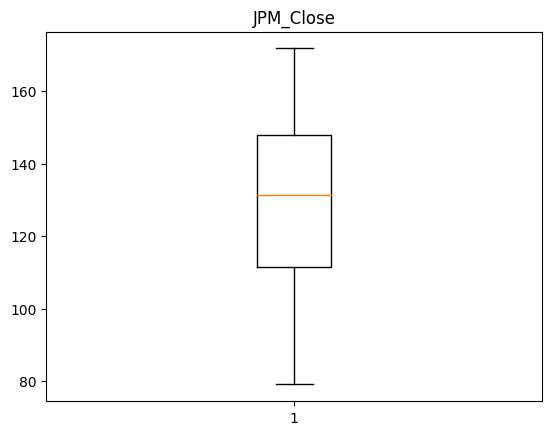

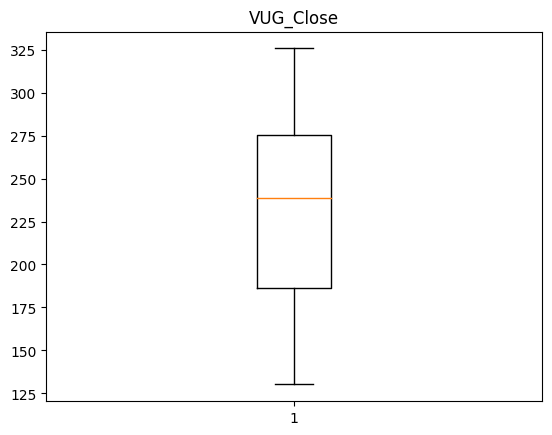

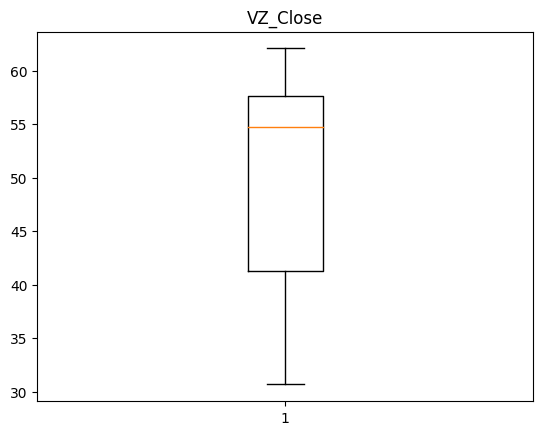

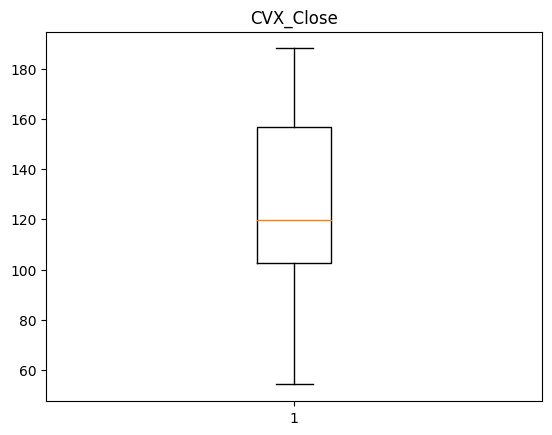

In [19]:
# Box plot to visually show risk
for column in df.columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()


### Calculate Standard Deviations

In [20]:
df_std = df.std()
df_std

AAPL_close      46.527387
SP500_Close    634.050177
VFH_Close       12.359487
MCD_Close       34.159286
JPM_Close       22.008490
VUG_Close       50.229268
VZ_Close         9.050779
CVX_Close       30.961282
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate the daily standard deviation of S&P 500
df['SP500_Close'].std()


634.0501770024873

In [22]:
# Determine which stock are riskier than the S&P 500
port_std = df[['AAPL_close','VFH_Close','MCD_Close', 'JPM_Close','VUG_Close','VZ_Close','CVX_Close','SP500_Close']].std()
port_std

AAPL_close      46.527387
VFH_Close       12.359487
MCD_Close       34.159286
JPM_Close       22.008490
VUG_Close       50.229268
VZ_Close         9.050779
CVX_Close       30.961282
SP500_Close    634.050177
dtype: float64

### Calculate the Annualized Standard Deviation

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df.rolling(window = 21).std()
rolling_std

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,2.949864,81.077885,2.361052,4.038609,5.153981,5.241615,0.493464,3.232544
2023-12-26,2.840517,84.337685,2.342054,4.058092,5.233764,5.449587,0.491057,3.497438
2023-12-27,2.704229,86.149084,2.277201,4.073646,5.256721,5.589939,0.492903,3.655267


In [24]:
rolling_std = rolling_std.iloc[:, 2:]

In [25]:
df_close.head()

,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
Date,,,,,,
2019-01-02,59.810001,176.059998,99.309998,134.289993,56.020000,110.690002
2019-01-03,58.779999,174.899994,97.110001,130.179993,56.220001,108.570000
2019-01-04,60.700001,178.279999,100.690002,135.360001,56.360001,110.820000
2019-01-07,60.840000,180.220001,100.760002,136.740005,56.720001,112.260002
2019-01-08,60.930000,180.600006,100.570000,138.410004,58.380001,111.769997


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
df_corr = df.corr()
df_corr

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
AAPL_close,1.000000,0.940698,0.696644,0.873889,0.637565,0.903968,-0.686032,0.500462
SP500_Close,0.940698,1.000000,0.873526,0.835496,0.827167,0.965597,-0.532924,0.439548
VFH_Close,0.696644,0.873526,1.000000,0.686349,0.903729,0.784380,-0.335753,0.471570
MCD_Close,0.873889,0.835496,0.686349,1.000000,0.622497,0.716929,-0.798104,0.714403
JPM_Close,0.637565,0.827167,0.903729,0.622497,1.000000,0.787877,-0.301382,0.282796
VUG_Close,0.903968,0.965597,0.784380,0.716929,0.787877,1.000000,-0.399714,0.208442
VZ_Close,-0.686032,-0.532924,-0.335753,-0.798104,-0.301382,-0.399714,1.000000,-0.777169
CVX_Close,0.500462,0.439548,0.471570,0.714403,0.282796,0.208442,-0.777169,1.000000


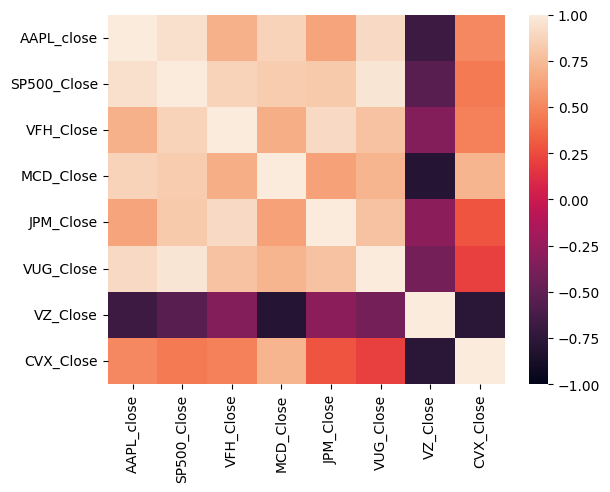

In [27]:
# Display de correlation matrix
sns.heatmap(df_corr, vmax = 1, vmin = -1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [28]:
# Calculate covariance of a single stock
df_cov = df.cov()
print(df_cov)

               AAPL_close    SP500_Close    VFH_Close     MCD_Close  \
AAPL_close    2164.797756   27751.245891   400.608573   1388.908000   
SP500_Close  27751.245891  402019.626957  6845.415500  18095.750617   
VFH_Close      400.608573    6845.415500   152.756930    289.770487   
MCD_Close     1388.908000   18095.750617   289.770487   1166.856825   
JPM_Close      652.864502   11542.687084   245.826618    467.989927   
VUG_Close     2112.605424   30752.223361   486.949627   1230.103309   
VZ_Close      -288.894485   -3058.263874   -37.558336   -246.748185   
CVX_Close      720.939176    8628.767611   180.453456    755.563914   

                JPM_Close     VUG_Close     VZ_Close    CVX_Close  
AAPL_close     652.864502   2112.605424  -288.894485   720.939176  
SP500_Close  11542.687084  30752.223361 -3058.263874  8628.767611  
VFH_Close      245.826618    486.949627   -37.558336   180.453456  
MCD_Close      467.989927   1230.103309  -246.748185   755.563914  
JPM_Close      484.3

In [30]:
# Calculate variance of S&P 500
df_var_sp = df['SP500_Close'].var()*252
df_var_sp

101308945.99313517

In [31]:
# Computing beta
df_beta = df_cov / df_var_sp
df_beta

,AAPL_close,SP500_Close,VFH_Close,MCD_Close,JPM_Close,VUG_Close,VZ_Close,CVX_Close
AAPL_close,0.000021,0.000274,3.954326e-06,0.000014,6.444293e-06,0.000021,-2.851619e-06,0.000007
SP500_Close,0.000274,0.003968,6.756970e-05,0.000179,1.139355e-04,0.000304,-3.018750e-05,0.000085
VFH_Close,0.000004,0.000068,1.507833e-06,0.000003,2.426505e-06,0.000005,-3.707307e-07,0.000002
MCD_Close,0.000014,0.000179,2.860266e-06,0.000012,4.619433e-06,0.000012,-2.435601e-06,0.000007
JPM_Close,0.000006,0.000114,2.426505e-06,0.000005,4.781154e-06,0.000009,-5.925784e-07,0.000002
VUG_Close,0.000021,0.000304,4.806581e-06,0.000012,8.597213e-06,0.000025,-1.793678e-06,0.000003
VZ_Close,-0.000003,-0.000030,-3.707307e-07,-0.000002,-5.925784e-07,-0.000002,8.085821e-07,-0.000002
CVX_Close,0.000007,0.000085,1.781219e-06,0.000007,1.902107e-06,0.000003,-2.149675e-06,0.000009


In [32]:
df_beta.shape

(8, 8)

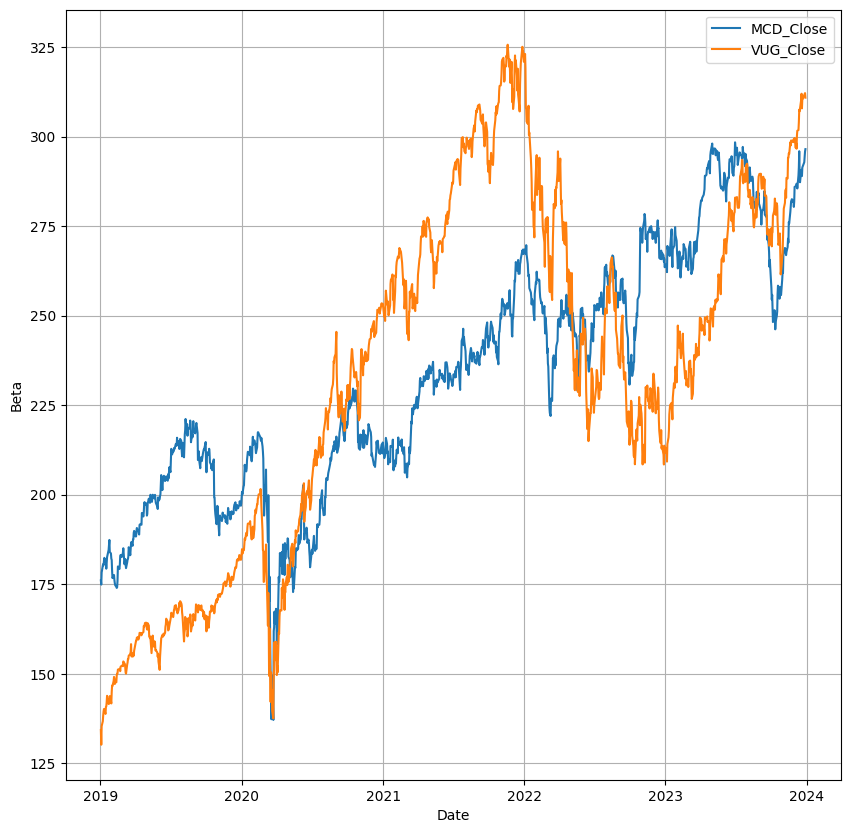

In [37]:
# Plot beta trend
dates = df.index
betas = df['MCD_Close']
sp_beta = df['VUG_Close']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'MCD_Close')
plt.plot(dates, sp_beta, label = 'VUG_Close')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window
rolling_ewa = df.ewm(span= 21).std()
rolling_ewa

,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.005398,0.001348,0.003949,0.001263,0.000590,0.003457,0.001777
2015-03-06,0.003731,0.008836,0.007988,0.006598,0.004304,0.005563,0.011072
2015-03-09,0.002996,0.007250,0.008255,0.005311,0.003814,0.006438,0.008821
2015-03-10,0.003045,0.008101,0.009581,0.006489,0.004746,0.007754,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.005812,0.006588,0.005294,0.005551,0.005606,0.009747,0.008278
2019-04-17,0.006320,0.006566,0.005171,0.005487,0.005727,0.009415,0.007913
2019-04-18,0.006027,0.006286,0.004932,0.005232,0.005475,0.008978,0.007546


# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
annualization_factor = np.sqrt(252)

In [44]:
df_mean = df.mean()
df_mean

AAPL_close      123.031085
SP500_Close    3755.831541
VFH_Close        77.925509
MCD_Close       233.196590
JPM_Close       129.582146
VUG_Close       233.698061
VZ_Close         50.811518
CVX_Close       126.128943
dtype: float64

In [45]:
sharpe_r = (df_mean * annualization_factor)/ df_std

sharpe_r

AAPL_close      41.976523
SP500_Close     94.033532
VFH_Close      100.087411
MCD_Close      108.371150
JPM_Close       93.466331
VUG_Close       73.858168
VZ_Close        89.120267
CVX_Close       64.668991
dtype: float64

In [38]:
#Annualized Sharpe Ratios
sr = (df.mean()*252)/df.std() * np.sqrt(252)
sr.sort_values(inplace=True, ascending = False)
sr

MCD_Close      27309.529692
VFH_Close      25222.027609
SP500_Close    23696.449961
JPM_Close      23553.515407
VZ_Close       22458.307316
VUG_Close      18612.258358
CVX_Close      16296.585680
AAPL_close     10578.083745
dtype: float64

In [39]:
print(len(sr.index))
print(len(sr))


8
8


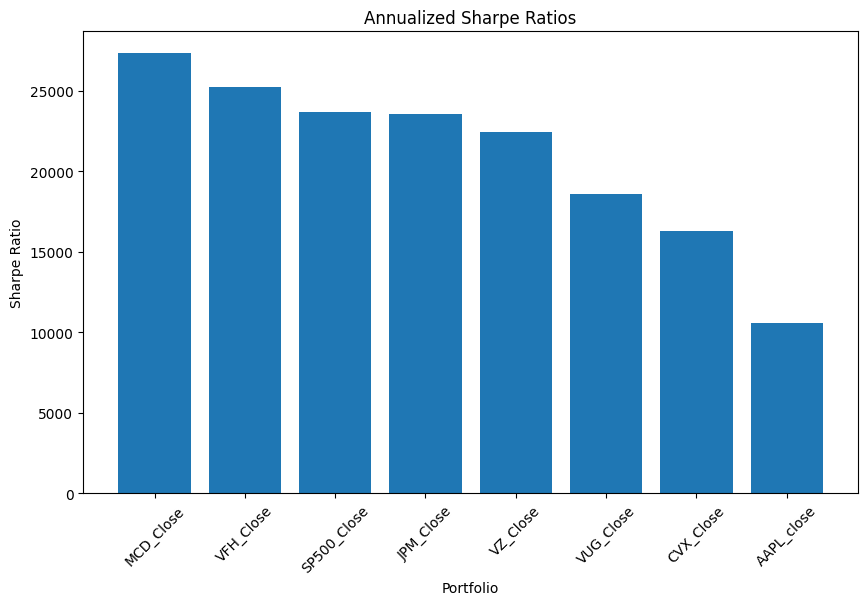

In [40]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sr.index, sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
algo_df = df['Algo 2'].head(252)
algo_df

Date
2015-03-04    0.002416
2015-03-05    0.004323
2015-03-06   -0.011460
2015-03-09    0.001303
2015-03-10   -0.012155
                ...   
2016-02-25    0.006605
2016-02-26    0.005180
2016-02-29   -0.000851
2016-03-01    0.017115
2016-03-02    0.010729
Name: Algo 2, Length: 252, dtype: float64

In [ ]:
# Reading data from 2nd stock
AGO1 = df['Algo 1'].head(252)
SP500

Date
2015-03-04   -0.004389
2015-03-05    0.001196
2015-03-06   -0.014174
2015-03-09    0.003944
2015-03-10   -0.016961
                ...   
2016-02-25    0.011348
2016-02-26   -0.001870
2016-02-29   -0.008121
2016-03-01    0.023869
2016-03-02    0.004094
Name: S&P500, Length: 252, dtype: float64

In [ ]:
# Reading data from 3rd stock
bh = df['BERKSHIRE HATHAWAY INC'].head(252)
bh

Date
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
2015-03-10   -0.009739
                ...   
2016-02-25   -0.011997
2016-02-26    0.008685
2016-02-29   -0.001977
2016-03-01    0.030164
2016-03-02    0.000073
Name: BERKSHIRE HATHAWAY INC, Length: 252, dtype: float64

In [ ]:
# Combine all stocks in a single DataFrame
cp = pd.concat([bh,AGO1,algo_df], axis = 1, join = 'inner')
cp

,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,
2015-03-04,0.004213,-0.008589,0.002416
2015-03-05,0.006726,-0.000955,0.004323
2015-03-06,-0.013098,-0.004957,-0.011460
2015-03-09,-0.001652,-0.005447,0.001303
2015-03-10,-0.009739,-0.001392,-0.012155
...,...,...,...
2016-02-25,-0.011997,-0.005957,0.006605
2016-02-26,0.008685,0.005786,0.005180
2016-02-29,-0.001977,0.004232,-0.000851


In [ ]:
# Reorganize portfolio data by having a column per symbol
cp.rename(columns = {'BERKSHIRE HATHAWAY INC':'BKH','Algo 2':'AGO2','Algo 1':'AGO1'}, inplace=True)
cp.head()

,BKH,AGO1,AGO2
Date,,,
2015-03-04,0.004213,-0.008589,0.002416
2015-03-05,0.006726,-0.000955,0.004323
2015-03-06,-0.013098,-0.004957,-0.011460
2015-03-09,-0.001652,-0.005447,0.001303
2015-03-10,-0.009739,-0.001392,-0.012155


In [ ]:
# Calculate daily returns
cp_returns = cp.pct_change()

# Drop NAs
cp_returns.dropna(inplace=True)
# Display sample data
cp_returns.head()

,BKH,AGO1,AGO2
Date,,,
2015-03-05,0.596558,-0.888803,0.789231
2015-03-06,-2.947282,4.190043,-3.650914
2015-03-09,-0.873840,0.098917,-1.113716
2015-03-10,4.893672,-0.744524,-10.327163
2015-03-11,-0.882260,-3.151399,-1.049752


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

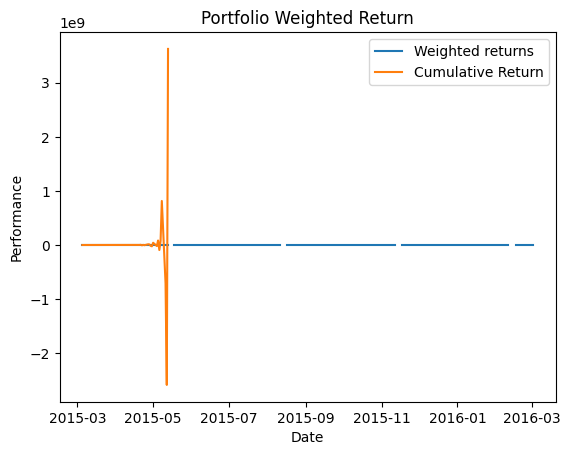

In [ ]:
# Set weights
wgt= [.33, .33, .33]

# Calculate portfolio return
opt_returns = cp_returns.dot(wgt)
cumulative_cp_returns = (opt_returns).cumprod()

# Display sample data
plt.plot(opt_returns, label = "Weighted returns")
plt.plot(cumulative_cp_returns, label="Cumulative Return")
plt.title("Portfolio Weighted Return")
plt.xlabel("Date")
plt.ylabel("Performance")
plt.legend()
plt.show()


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([cp_returns, daily_returns], axis = 1, join = 'inner')
all_returns.head(10)

,BKH,AGO1,AGO2,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,,,
2015-03-05,0.596558,-0.888803,0.789231,-0.888803,0.789231,-1.272547,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.947282,4.190043,-3.650914,4.190043,-3.650914,-12.850368,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-0.873840,0.098917,-1.113716,0.098917,-1.113716,-1.278290,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,4.893672,-0.744524,-10.327163,-0.744524,-10.327163,-5.300052,-18.625495,-2.263954,-3.067380,4.893672
2015-03-11,-0.882260,-3.151399,-1.049752,-3.151399,-1.049752,-0.886940,-1.390912,-1.966750,-1.274177,-0.882260
2015-03-12,-10.419761,-1.980244,18.292235,-1.980244,18.292235,-7.571275,1.060018,0.989412,2.960622,-10.419761
2015-03-13,-1.753810,0.847814,-1.433827,0.847814,-1.433827,-1.482062,-1.302164,-1.139064,-1.281865,-1.753810
2015-03-16,-1.989242,-0.373997,-1.813462,-0.373997,-1.813462,-3.227876,-4.163697,-3.508046,-3.151096,-1.989242
2015-03-17,-0.952281,-0.168830,-0.690667,-0.168830,-0.690667,-1.245330,-0.728894,-0.182672,-1.086405,-0.952281


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

BKH                            0
AGO1                           0
AGO2                           0
Algo 1                         0
Algo 2                         0
S&P500                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
asd = cp.std() * np.sqrt(252)
asd.sort_values(inplace=True)
asd

AGO1    0.153669
AGO2    0.158548
BKH     0.238516
dtype: float64

### Calculate and plot rolling `std` with 21-day window

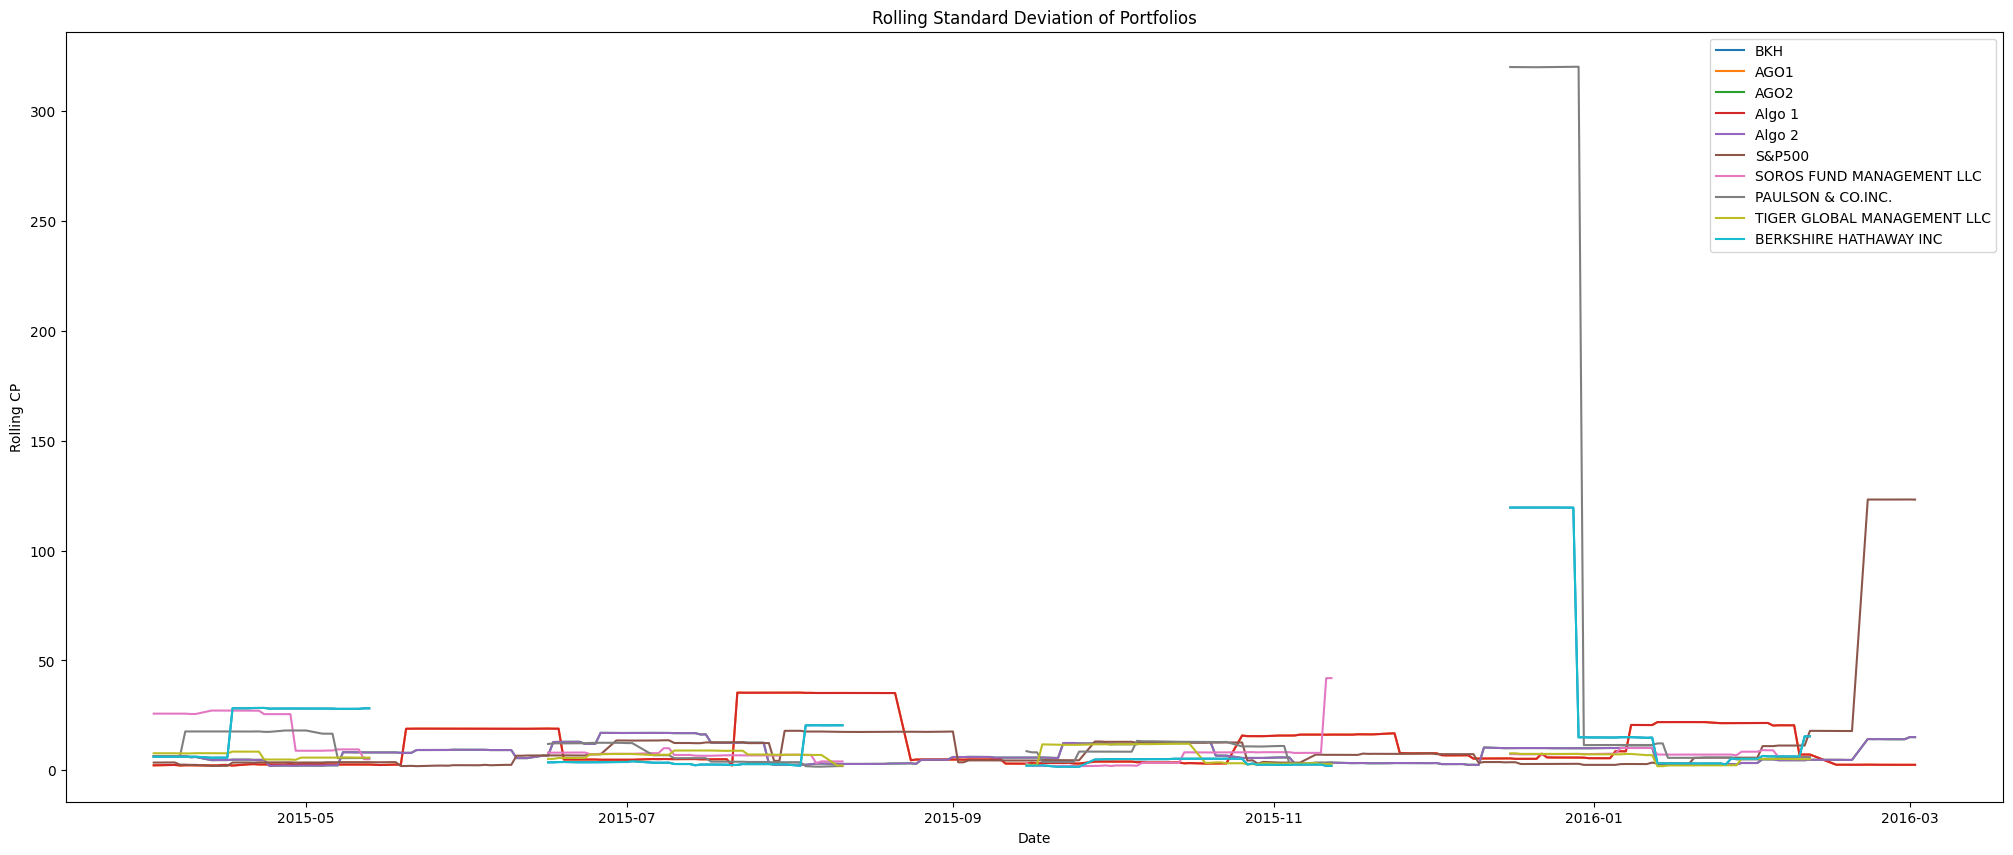

In [ ]:
# Calculate rolling standard deviation
rolling_cp = all_returns.rolling(window = 21).std()
# Plot rolling standard deviation
plt.figure(figsize=(25, 10))
for column in rolling_cp.columns:
        plt.plot(rolling_cp.index, rolling_cp[column], label=column)

plt.title('Rolling Standard Deviation of Portfolios')
plt.xlabel('Date')
plt.ylabel('Rolling CP')
plt.legend()
plt.show()


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
all_returns_corr = all_returns.corr()
all_returns_corr

,BKH,AGO1,AGO2,Algo 1,Algo 2,S&P500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
BKH,1.000000,-0.013854,-0.015716,-0.013854,-0.015716,-0.030301,-0.019883,0.004221,0.013982,1.000000
AGO1,-0.013854,1.000000,0.019641,1.000000,0.019641,-0.001107,0.018195,0.012391,0.045504,-0.013854
AGO2,-0.015716,0.019641,1.000000,0.019641,1.000000,-0.393045,0.007046,0.012374,0.093358,-0.015716
Algo 1,-0.013854,1.000000,0.019641,1.000000,0.019641,-0.001107,0.018195,0.012391,0.045504,-0.013854
Algo 2,-0.015716,0.019641,1.000000,0.019641,1.000000,-0.393045,0.007046,0.012374,0.093358,-0.015716
S&P500,-0.030301,-0.001107,-0.393045,-0.001107,-0.393045,1.000000,-0.045170,0.014492,0.141674,-0.030301
SOROS FUND MANAGEMENT LLC,-0.019883,0.018195,0.007046,0.018195,0.007046,-0.045170,1.000000,0.018820,0.077258,-0.019883
PAULSON & CO.INC.,0.004221,0.012391,0.012374,0.012391,0.012374,0.014492,0.018820,1.000000,0.092565,0.004221
TIGER GLOBAL MANAGEMENT LLC,0.013982,0.045504,0.093358,0.045504,0.093358,0.141674,0.077258,0.092565,1.000000,0.013982
BERKSHIRE HATHAWAY INC,1.000000,-0.013854,-0.015716,-0.013854,-0.015716,-0.030301,-0.019883,0.004221,0.013982,1.000000


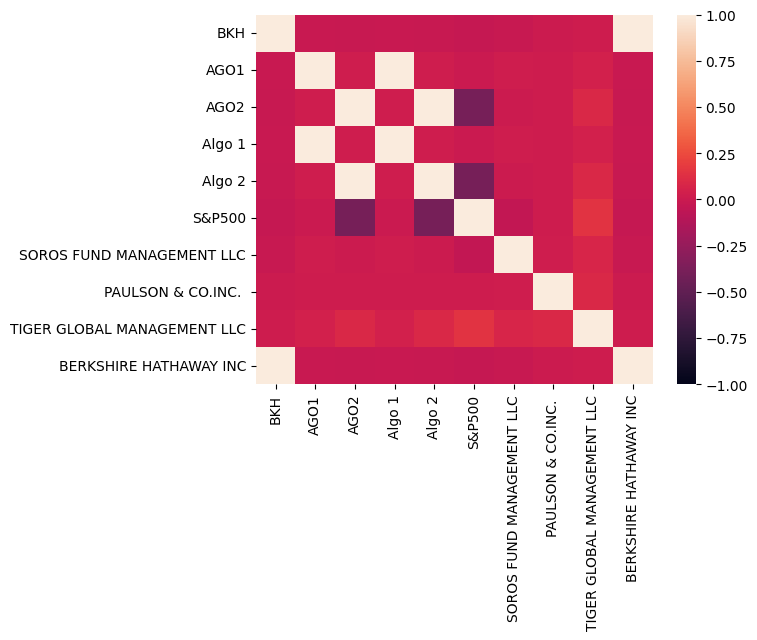

In [ ]:
sns.heatmap(all_returns_corr, vmax = 1, vmin = -1);

In [ ]:
cp_returns.columns

Index(['BKH', 'AGO1', 'AGO2'], dtype='object')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
cp_beta = pd.concat([bh,AGO1,algo_df,sp_return], axis = 1, join = 'inner')
cp_beta.head()

,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,
2015-03-04,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.001652,-0.005447,0.001303,0.003944
2015-03-10,-0.009739,-0.001392,-0.012155,-0.016961


In [ ]:
cp["portfolio"] = cp.mean(axis=1)
cp['portfolio']

Date
2015-03-04   -0.000653
2015-03-05    0.003365
2015-03-06   -0.009838
2015-03-09   -0.001932
2015-03-10   -0.007762
                ...   
2016-02-25   -0.003783
2016-02-26    0.006550
2016-02-29    0.000468
2016-03-01    0.014004
2016-03-02    0.003689
Name: portfolio, Length: 252, dtype: float64

In [ ]:
# Calculate and plot Beta
covar = cp_beta['portfolio'].cov(cp_beta["S&P500"])
#Calculate variance
Var = cp_beta["S&P500"].var()
#Calculate Beta
portfolio_beta = covar / Var
portfolio_beta


0.7292130452177249

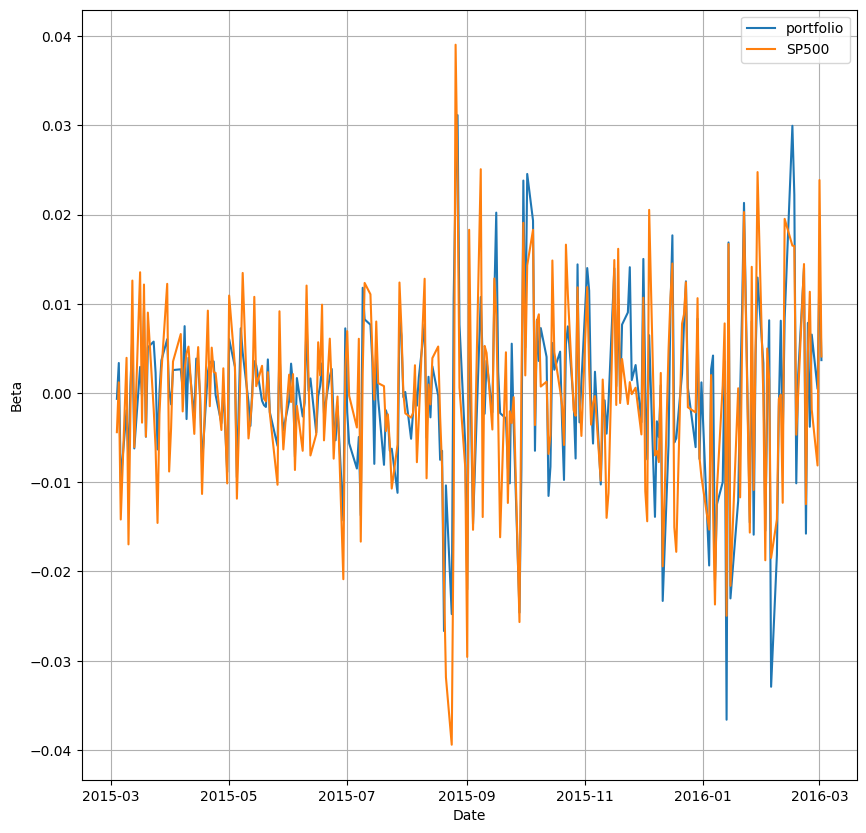

In [ ]:
# Plot beta trend
dates = cp.index
betas = cp['portfolio']
sp_beta = cp_beta['S&P500']

plt.figure(figsize = (10,10))
plt.plot(dates, betas, label = 'portfolio')
plt.plot(dates, sp_beta, label = 'SP500')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.legend()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
cp_sr = (cp.mean()*252)/cp.std() * np.sqrt(252)
cp_sr.sort_values(inplace=True, ascending = False)
cp_sr

AGO1         454.170543
portfolio     25.280648
BKH         -115.763421
AGO2        -193.305376
dtype: float64

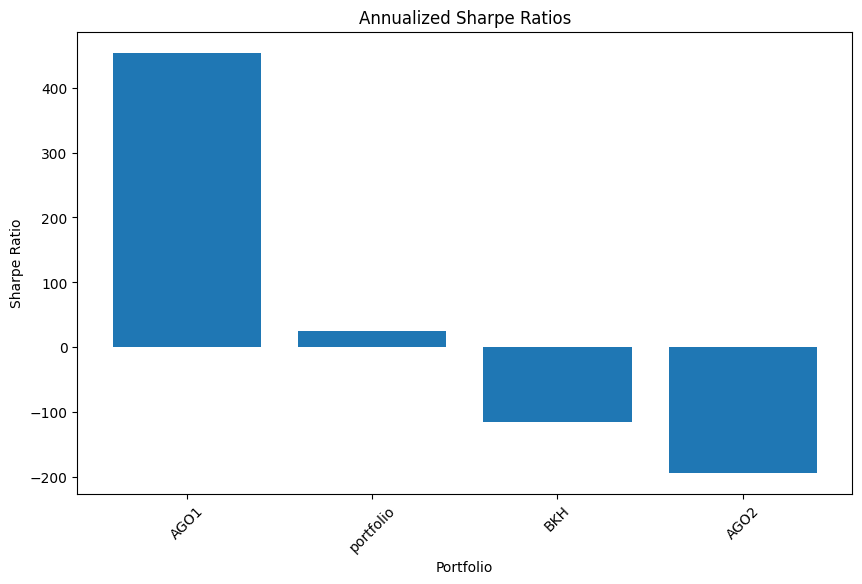

In [ ]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cp_sr.index, cp_sr)
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Annualized Sharpe Ratios')
plt.xticks(rotation=45)
plt.plot();  # Rotate x-axis la

### How does your portfolio do?

Write your answer here!